1. Download the dataset: Dataset

2. Load the dataset.

In [2]:
import pandas as pd
df = pd.read_csv('/content/data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

3. Perform Below Visualizations.

Univariate Analysis

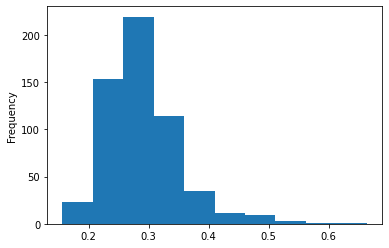

In [4]:
import matplotlib.pyplot as plt

df[df['symmetry_worst'] < 182012.4]['symmetry_worst'].plot.hist()

In [6]:
df[df['symmetry_worst'] > 0.4]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890,NaN
3,84348301,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300,NaN
8,844981,M,13.000,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720,NaN
9,84501001,M,12.460,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750,NaN
15,84799002,M,14.540,27.54,96.73,658.8,0.11390,0.15950,0.16390,0.07364,...,37.13,124.10,943.2,0.1678,0.6577,0.7026,0.17120,0.4218,0.13410,NaN
22,8511133,M,15.340,14.26,102.50,704.4,0.10730,0.21350,0.20770,0.09756,...,19.08,125.10,980.9,0.1390,0.5954,0.6305,0.23930,0.4667,0.09946,NaN
25,852631,M,17.140,16.40,116.00,912.7,0.11860,0.22760,0.22290,0.14010,...,21.40,152.40,1461.0,0.1545,0.3949,0.3853,0.25500,0.4066,0.10590,NaN
26,852763,M,14.580,21.53,97.41,644.8,0.10540,0.18680,0.14250,0.08783,...,33.21,122.40,896.9,0.1525,0.6643,0.5539,0.27010,0.4264,0.12750,NaN
28,852973,M,15.300,25.27,102.40,732.4,0.10820,0.16970,0.16830,0.08751,...,36.71,149.30,1269.0,0.1641,0.6110,0.6335,0.20240,0.4027,0.09876,NaN
31,853612,M,11.840,18.70,77.93,440.6,0.11090,0.15160,0.12180,0.05182,...,28.12,119.40,888.7,0.1637,0.5775,0.6956,0.15460,0.4761,0.14020,NaN


Bi-Variate Analysis

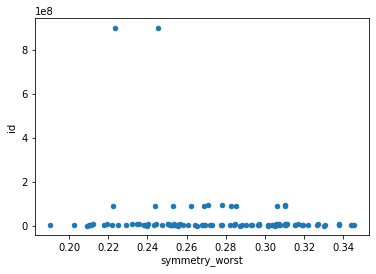

In [9]:
df[df['symmetry_worst'] < 0.35].sample(100).plot.scatter(x='symmetry_worst', y='id')

Multi - Variate Analysis

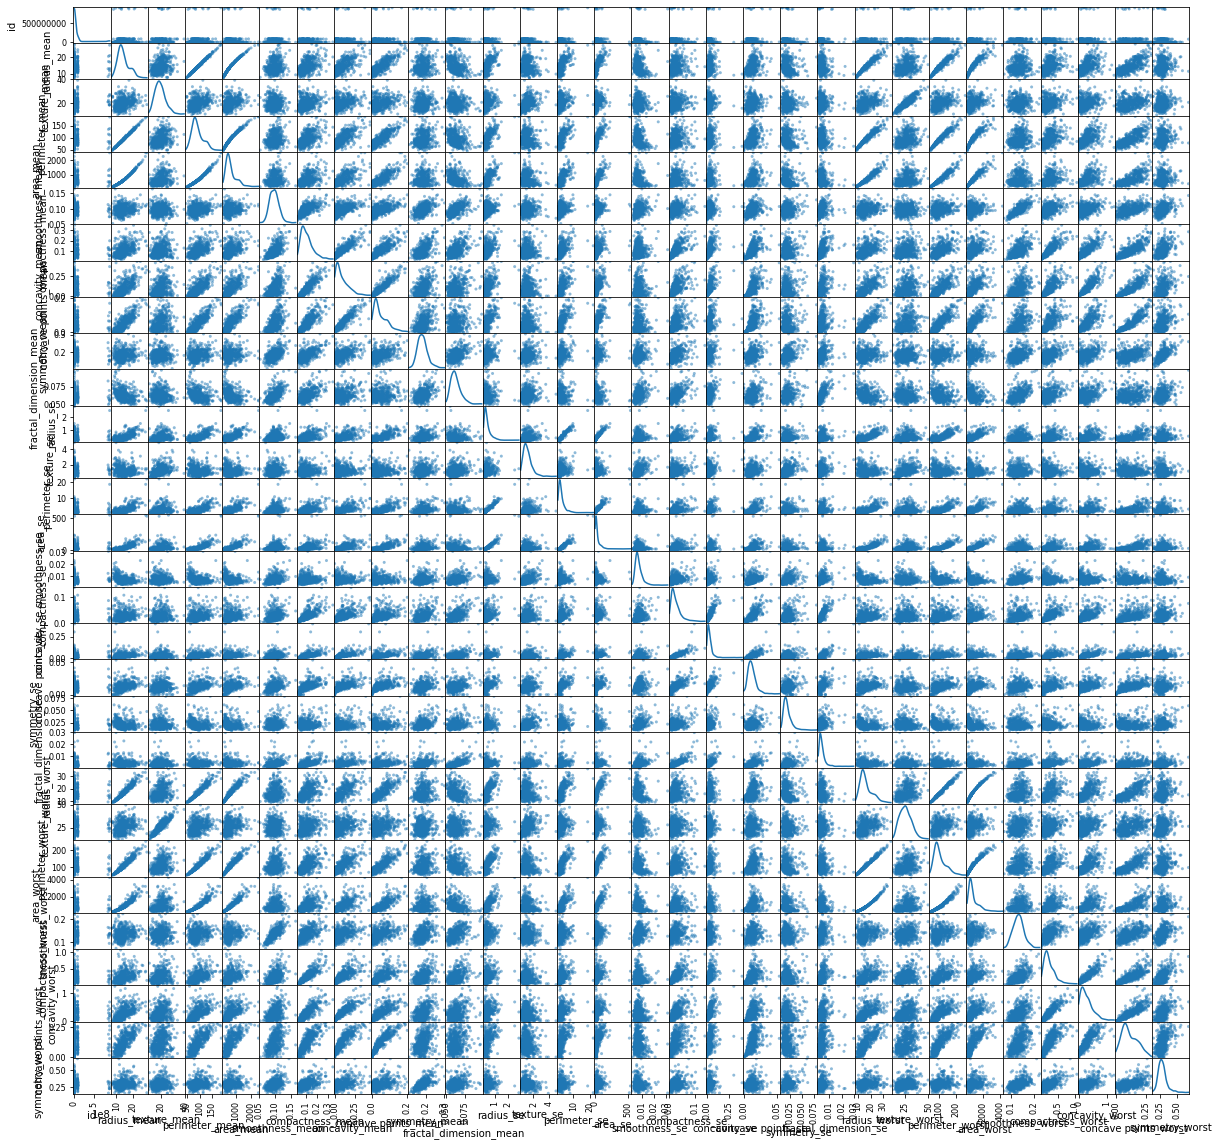

In [12]:
pd.plotting.scatter_matrix(df.loc[:, "id":"symmetry_worst"], diagonal="kde",figsize=(20,20))
plt.show()

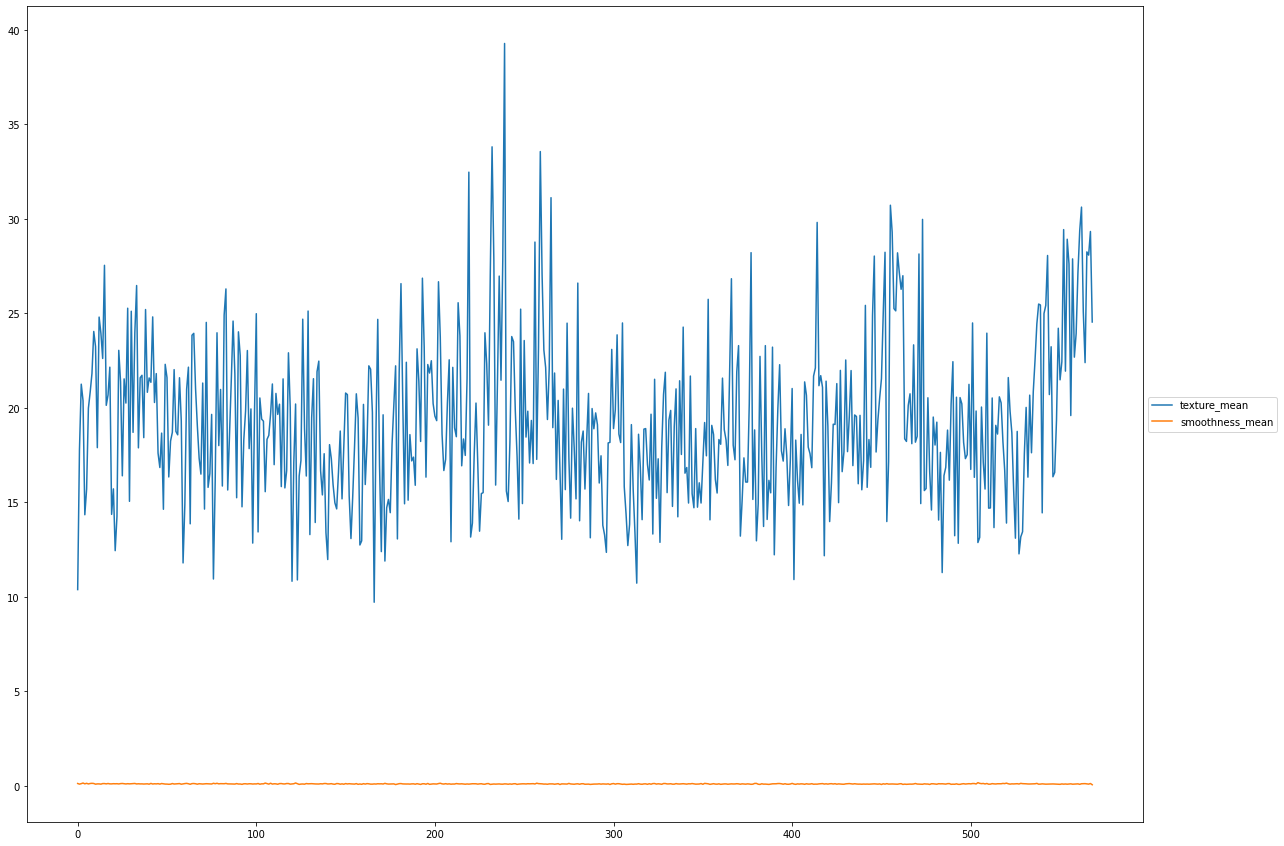

In [13]:
ax = df[["texture_mean","smoothness_mean"]].plot(figsize=(20,15))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));

4. Perform descriptive statistics on the dataset.

In [14]:
import numpy as np
print(df['symmetry_worst'].mean())

0.2900755711775044


In [15]:
import numpy as np
print(df['symmetry_worst'].sum())

165.053


5. Handle the Missing values.

In [16]:
missing_values_count = df.isnull().sum()
missing_values_count[0:15]

id                        0
diagnosis                 0
radius_mean               0
texture_mean              0
perimeter_mean            0
area_mean                 0
smoothness_mean           0
compactness_mean          0
concavity_mean            0
concave points_mean       0
symmetry_mean             0
fractal_dimension_mean    0
radius_se                 0
texture_se                0
perimeter_se              0
dtype: int64

6. Find the outliers and replace the outliers

In [17]:
median = float(df['perimeter_worst'].median())
df["perimeter_worst"] = np.where(df["perimeter_worst"] > median, median, df['perimeter_worst'])
print(median)

97.66


7. Check for Categorical columns and perform encoding.

In [22]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,97.66,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,97.66,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,97.66,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,97.66,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,97.66,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [19]:
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,97.66,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,97.66,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,97.66,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,97.66,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


8. Split the data into dependent and independent variables.

Independent Variables

In [20]:
X = df.iloc[:, :-1].values
print(X)

[[842302 'M' 17.99 ... 0.2654 0.4601 0.1189]
 [842517 'M' 20.57 ... 0.186 0.275 0.08902]
 [84300903 'M' 19.69 ... 0.243 0.3613 0.08758]
 ...
 [926954 'M' 16.6 ... 0.1418 0.2218 0.0782]
 [927241 'M' 20.6 ... 0.265 0.4087 0.124]
 [92751 'B' 7.76 ... 0.0 0.2871 0.07039]]


Dependent Variables

In [21]:
Y = df.iloc[:, -1].values
print(Y)

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

9. Scale the independent variables

In [26]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
df[["perimeter_worst", "area_worst"]] = min_max_scaler.fit_transform(df[["perimeter_worst", "area_worst"]])
print(df)

           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compa

10. Split the data into training and testing

In [27]:
training_data = df.sample(frac=0.8, random_state=25)
testing_data = df.drop(training_data.index)
print(training_data)

           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
522     91789         B        11.26         19.83           71.30      388.1   
120    865137         B        11.41         10.82           73.34      403.3   
241    883539         B        12.42         15.04           78.61      476.5   
362   9010598         B        12.76         18.84           81.87      496.6   
221   8812818         B        13.56         13.90           88.59      561.3   
..        ...       ...          ...           ...             ...        ...   
258    887181         M        15.66         23.20          110.20      773.5   
193    875263         M        12.34         26.86           81.15      477.4   
15   84799002         M        14.54         27.54           96.73      658.8   
368   9011971         M        21.71         17.25          140.90     1546.0   
486    913102         B        14.64         16.85           94.21      666.0   

     smoothness_mean  compa

In [28]:
print(testing_data)

           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
5      843786         M        12.45         15.70           82.57      477.1   
14   84667401         M        13.73         22.61           93.60      578.3   
17   84862001         M        16.13         20.68          108.10      798.8   
20    8510653         B        13.08         15.71           85.63      520.0   
22    8511133         M        15.34         14.26          102.50      704.4   
..        ...       ...          ...           ...             ...        ...   
535    919555         M        20.55         20.86          137.80     1308.0   
547    922840         B        10.26         16.58           65.85      320.8   
562    925622         M        15.22         30.62          103.40      716.9   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   

     smoothness_mean  compa